# Genre recognition: experiment

Goal: Test if we have an edge with law training / testing ratios, i.e. when there is not much training data. With graph.

Conclusion: The trend observed in `13g_ratio` continues.

Observations:

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'test_size'
Pvalues = [.90, .91, .92, .93, .94, .95, .96, .97, .98, .99]

# Regenerate the graph or the features at each iteration.
regen_graph = False
regen_features = False
regen_baseline = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['data_scaling_graph'] = 'features'
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'cosine_sim'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5
p['majority_voting'] = False

### Data parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Added white noise.
p['noise_std'] = 0

### Numerical parameters

In [4]:
# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['test_size'] = 0.1
p['Ncv'] = 20
p['dataset_classification'] = 'Z'

## Processing

In [5]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph -------------------- 

Data: (149000, 96), float32
Elapsed time: 157.17 seconds
All self-referenced in the first column: False
dist in [0.644446253777, 1.0]
w in [0.644446253777, 1.0]
Ones on the diagonal: 148961 (over 149000)
assert: False
W in [0.0, 1.0]
Datasets:
  L_data    : (2392274,), float32
  L_indices : (2392274,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2392274,), float32
  W_indices : (2392274,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = cosine_sim
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 166.15 seconds

 -------------------- Features -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x n=96 -> 123,648,000 

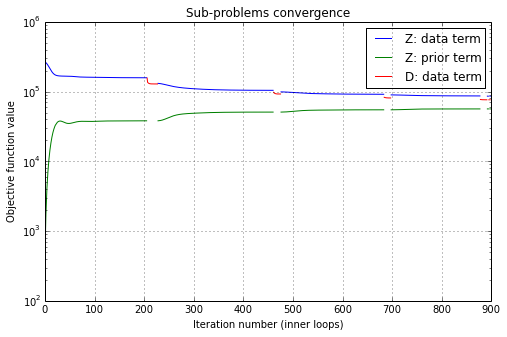

Inner loop: 901 iterations
g(Z) = ||X-DZ||_2^2 = 7.605574e+04
rdiff: 0.00149753958214
i(Z) = ||Z||_1 = 5.637479e+04
j(Z) = tr(Z^TLZ) = 9.808221e+03


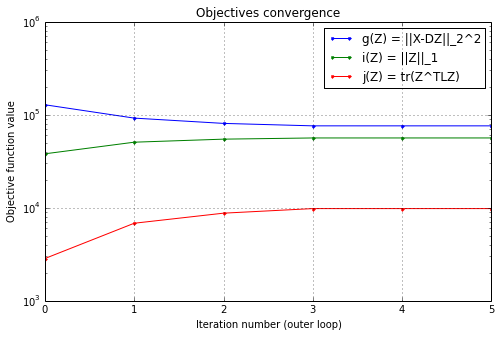

Global objective: 1.422388e+05


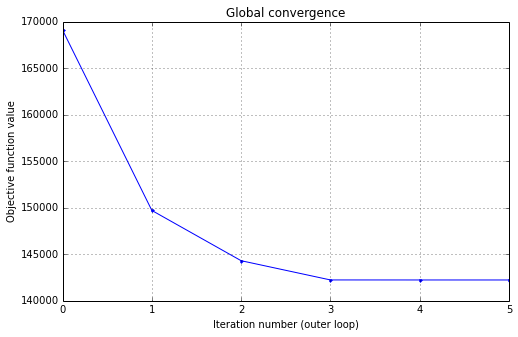

Outer loop: 6 iterations

Z in [-0.0576239787042, 0.727681100368]
Sparsity of Z: 3,814,985 non-zero entries out of 19,072,000 entries, i.e. 20.0%.


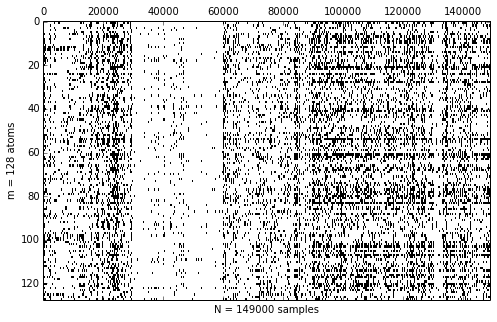

D in [-0.0280325673521, 0.897612154484]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


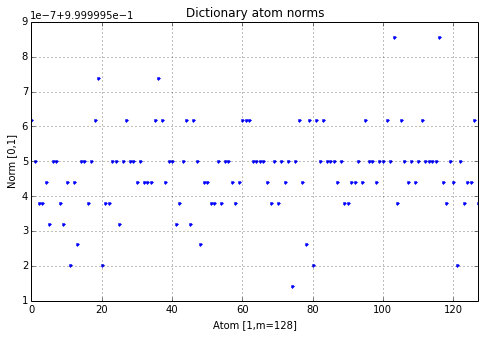

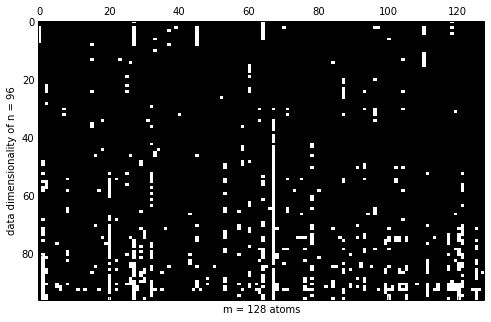

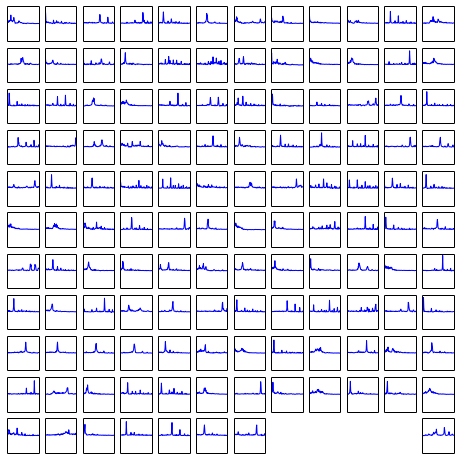

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 1923 seconds

 -------------------- Classification, test_size = 0.9 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,00

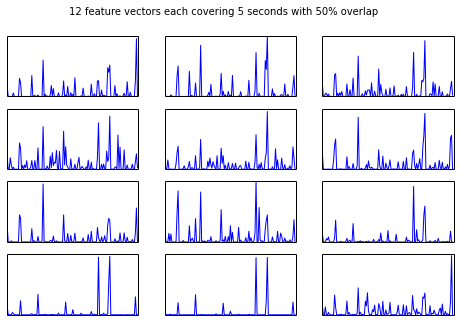

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 600.0 training, 5400.0 testing
  65 (+/- 0.9) <- [64 65 64 63 66 65 65 65 65 65]
  66 (+/- 0.9) <- [63 66 66 65 66 65 66 66 66 64]
  66 (+/- 0.5) <- [65 65 65 64 66 66 66 64 64 65]
  66 (+/- 0.7) <- [66 66 65 66 66 65 64 65 65 65]
  66 (+/- 1.2) <- [65 64 66 67 67 66 65 65 64 63]
  66 (+/- 0.9) <- [66 65 65 66 67 64 66 64 66 64]
  66 (+/- 0.9) <- [65 64 66 66 66 66 65 66 63 66]
  66 (+/- 1.0) <- [64 66 65 64 64 66 66 65 67 66]
  66 (+/- 0.6) <- [6

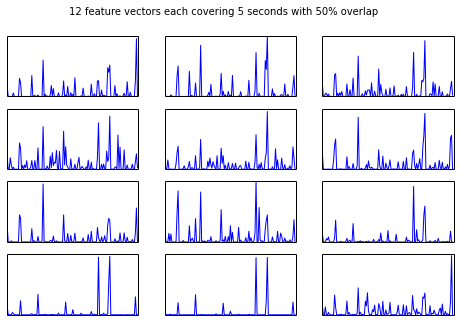

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 540.0 training, 5460.0 testing
  64 (+/- 0.9) <- [64 65 63 62 65 64 64 65 65 64]
  65 (+/- 0.8) <- [63 65 65 64 65 65 65 64 65 63]
  65 (+/- 0.6) <- [64 64 65 64 66 65 65 64 64 64]
  65 (+/- 0.7) <- [66 65 65 65 65 65 64 64 63 64]
  65 (+/- 0.9) <- [64 63 64 66 64 65 63 65 63 64]
  65 (+/- 1.0) <- [65 63 64 65 66 63 66 64 65 64]
  65 (+/- 0.9) <- [65 64 64 65 64 65 64 65 62 65]
  65 (+/- 1.0) <- [64 65 64 62 64 65 65 64 66 65]
  65 (+/- 0.7) <- [6

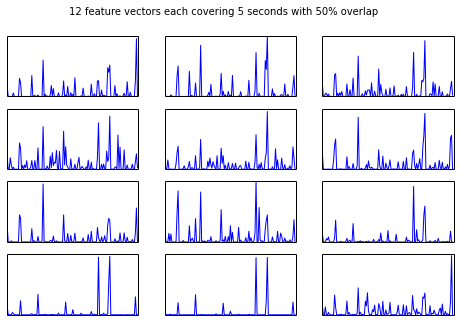

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 480.0 training, 5520.0 testing
  64 (+/- 0.8) <- [63 65 63 62 65 63 62 64 64 63]
  64 (+/- 0.9) <- [62 65 65 63 62 63 64 63 65 63]
  64 (+/- 0.9) <- [65 63 63 63 65 64 64 64 62 63]
  64 (+/- 0.7) <- [65 64 63 64 63 62 63 63 63 63]
  64 (+/- 0.9) <- [62 62 64 64 64 65 62 65 63 64]
  64 (+/- 0.9) <- [64 62 64 64 64 63 65 64 65 64]
  64 (+/- 0.7) <- [63 63 64 64 64 64 64 64 62 64]
  64 (+/- 1.1) <- [65 64 63 61 63 65 64 64 64 63]
  65 (+/- 0.7) <- [6

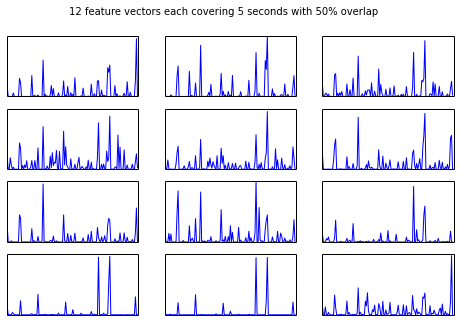

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 420.0 training, 5580.0 testing
  63 (+/- 1.2) <- [62 63 62 60 64 63 61 63 63 61]
  63 (+/- 1.1) <- [61 64 64 61 62 62 61 63 63 62]
  63 (+/- 1.4) <- [65 60 63 62 64 62 63 62 61 62]
  63 (+/- 0.8) <- [63 64 62 64 63 61 63 62 62 63]
  63 (+/- 1.2) <- [61 62 64 65 62 64 61 63 64 63]
  63 (+/- 0.8) <- [62 61 64 62 63 62 63 61 63 63]
  63 (+/- 0.8) <- [62 62 63 63 63 64 63 63 61 64]
  63 (+/- 1.1) <- [63 63 60 61 62 64 64 63 63 62]
  63 (+/- 1.0) <- [6

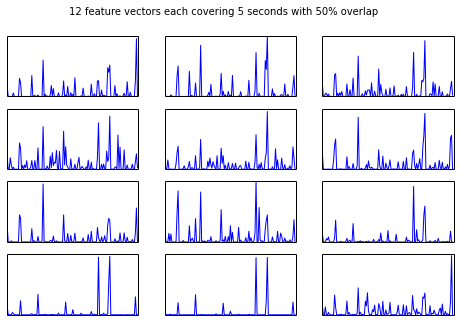

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 360.0 training, 5640.0 testing
  61 (+/- 0.8) <- [61 61 60 59 60 62 60 62 62 61]
  62 (+/- 1.2) <- [60 62 64 61 62 61 60 63 60 61]
  61 (+/- 1.4) <- [62 59 60 61 61 61 62 63 60 62]
  62 (+/- 1.1) <- [62 63 62 62 60 61 60 60 62 61]
  62 (+/- 1.0) <- [60 61 62 63 60 63 61 60 62 61]
  62 (+/- 1.0) <- [61 59 63 62 62 61 61 60 63 62]
  62 (+/- 1.1) <- [60 61 62 62 62 63 62 63 60 62]
  62 (+/- 1.2) <- [61 60 60 61 61 62 64 61 62 61]
  62 (+/- 1.3) <- [6

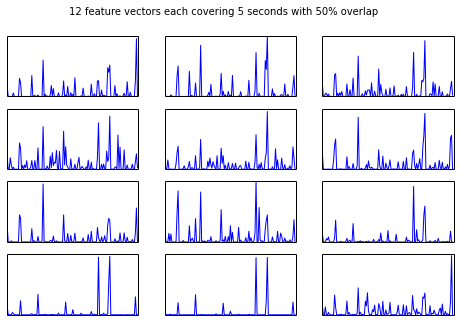

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 300.0 training, 5700.0 testing
  60 (+/- 1.4) <- [58 61 60 57 61 60 60 60 62 60]
  60 (+/- 1.6) <- [61 62 63 59 59 58 59 61 57 59]
  60 (+/- 1.6) <- [62 57 57 59 60 59 60 61 59 62]
  60 (+/- 1.2) <- [59 61 61 62 58 60 59 58 61 60]
  61 (+/- 1.1) <- [59 60 59 60 60 63 61 60 60 60]
  61 (+/- 1.1) <- [60 58 61 62 61 59 60 60 61 62]
  61 (+/- 1.0) <- [60 60 60 61 60 62 59 61 59 61]
  61 (+/- 1.2) <- [61 60 59 59 58 61 62 60 62 59]
  61 (+/- 1.0) <- [6

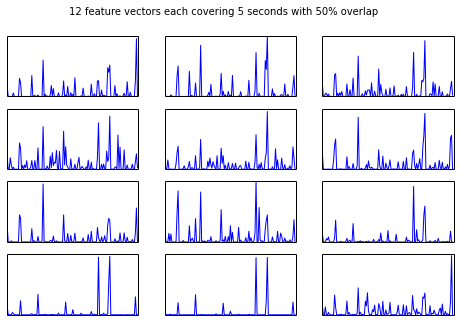

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 240.0 training, 5760.0 testing
  59 (+/- 1.2) <- [57 58 59 56 57 58 60 59 60 57]
  58 (+/- 1.3) <- [57 58 61 58 59 55 57 58 57 57]
  58 (+/- 1.3) <- [58 57 55 58 58 57 60 58 57 59]
  59 (+/- 1.1) <- [58 58 59 58 58 58 60 57 60 56]
  59 (+/- 1.5) <- [58 58 57 60 58 61 58 57 56 59]
  59 (+/- 1.4) <- [58 55 58 58 58 57 59 60 58 60]
  59 (+/- 1.3) <- [58 57 57 59 57 61 56 59 59 60]
  59 (+/- 0.9) <- [60 58 58 57 59 59 60 58 59 58]
  58 (+/- 1.0) <- [5

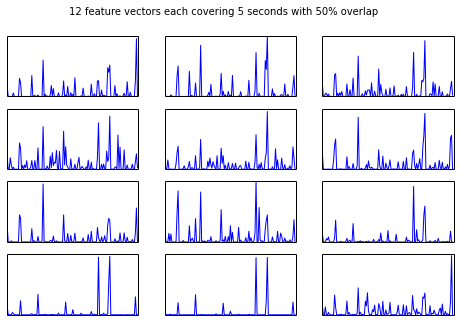

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 180.0 training, 5820.0 testing
  56 (+/- 1.6) <- [54 53 55 54 55 56 57 58 56 53]
  56 (+/- 1.3) <- [55 56 58 58 55 54 55 55 54 56]
  56 (+/- 1.8) <- [58 54 51 57 55 56 57 54 56 57]
  56 (+/- 1.3) <- [56 58 56 58 56 55 55 55 56 53]
  56 (+/- 0.9) <- [55 56 55 55 55 57 56 56 54 54]
  56 (+/- 1.3) <- [55 53 55 56 56 54 56 57 54 58]
  57 (+/- 1.2) <- [56 55 56 56 56 58 55 56 56 59]
  57 (+/- 1.4) <- [55 56 56 56 54 55 59 56 58 57]
  57 (+/- 1.2) <- [5

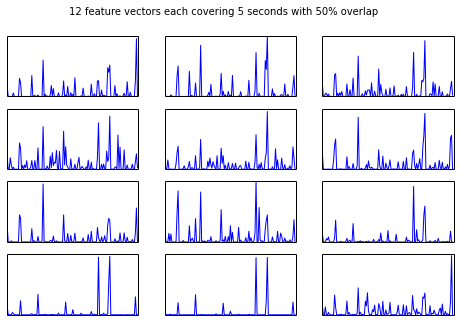

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 120.0 training, 5880.0 testing
  52 (+/- 1.1) <- [51 52 51 50 52 53 53 51 53 52]
  53 (+/- 1.5) <- [54 55 53 52 54 55 52 51 50 52]
  52 (+/- 1.6) <- [53 51 48 54 51 52 51 52 52 53]
  53 (+/- 1.2) <- [53 55 52 54 54 53 52 53 54 51]
  52 (+/- 0.9) <- [50 52 52 52 52 53 51 51 50 52]
  53 (+/- 1.5) <- [51 51 53 52 54 52 51 53 50 55]
  53 (+/- 1.2) <- [52 51 55 51 51 54 53 52 53 53]
  53 (+/- 2.3) <- [52 51 53 52 51 47 56 53 54 55]
  53 (+/- 1.2) <- [5

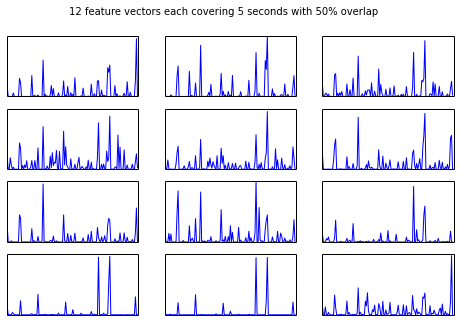

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.1 %
Clips accuracy: 72.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 60.0 training, 5940.0 testing
  47 (+/- 2.2) <- [47 50 44 43 47 49 45 45 49 49]
  48 (+/- 1.9) <- [48 51 49 44 47 49 49 47 46 47]
  48 (+/- 2.6) <- [45 45 49 51 49 45 51 48 44 50]
  49 (+/- 1.3) <- [47 49 47 47 50 49 48 46 47 49]
  47 (+/- 2.5) <- [42 48 46 46 47 48 45 48 44 51]
  47 (+/- 2.0) <- [45 47 48 47 49 48 44 44 46 51]
  48 (+/- 2.1) <- [46 48 52 48 44 49 46 46 46 48]
  48 (+/- 1.3) <- [47 46 47 48 48 48 50 47 50 49]
  47 (+/- 2.3) <- [49

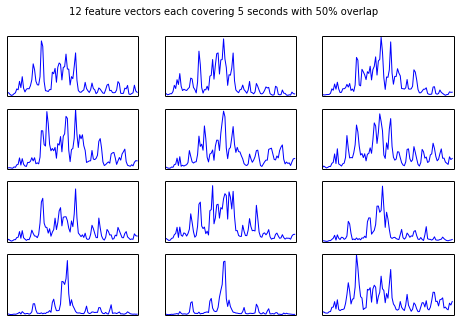

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 600.0 training, 5400.0 testing
  61 (+/- 1.2) <- [60 61 60 58 62 61 62 60 61 62]
  61 (+/- 0.8) <- [59 60 59 60 61 61 61 61 59 60]
  61 (+/- 0.6) <- [61 59 60 60 61 60 61 60 60 61]
  61 (+/- 0.8) <- [62 61 60 61 60 62 61 60 62 60]
  61 (+/- 1.0) <- [60 60 61 62 62 60 59 63 60 60]
  61 (+/- 0.7) <- [60 61 59 59 61 61 60 61 61 61]
  61 (+/- 1.0) <- [61 61 59 60 60 60 61 61 59 62]
  61 (+/- 1.0) <- [60 62 60 61 59 59 62 62 62 60]
  61 (+/- 0.9) <- [61 5

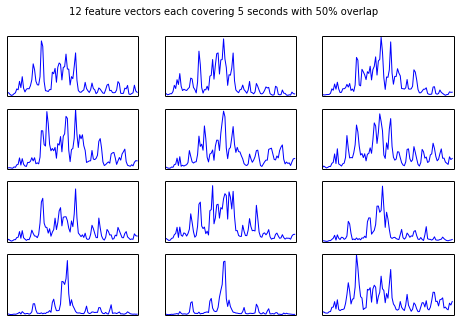

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 540.0 training, 5460.0 testing
  60 (+/- 1.1) <- [58 61 59 58 61 59 62 60 60 61]
  60 (+/- 0.9) <- [58 60 59 60 61 61 59 60 59 59]
  60 (+/- 0.7) <- [60 59 59 59 61 60 60 59 59 61]
  61 (+/- 0.9) <- [61 60 59 60 60 61 62 59 61 59]
  60 (+/- 1.0) <- [59 59 60 61 62 60 59 61 59 60]
  60 (+/- 0.5) <- [60 61 60 59 60 60 60 60 60 60]
  60 (+/- 1.2) <- [60 60 58 60 58 60 61 60 58 62]
  60 (+/- 0.9) <- [61 61 60 60 58 58 60 60 61 60]
  60 (+/- 0.8) <- [60 5

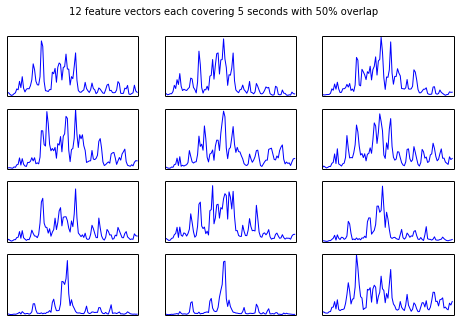

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 480.0 training, 5520.0 testing
  60 (+/- 1.0) <- [58 59 59 57 58 60 60 59 59 60]
  60 (+/- 0.9) <- [58 59 59 59 61 60 59 60 59 59]
  60 (+/- 0.9) <- [60 58 59 58 60 58 60 59 59 60]
  60 (+/- 0.9) <- [61 60 58 59 59 60 59 58 61 58]
  60 (+/- 1.3) <- [58 58 60 61 60 59 58 62 59 60]
  60 (+/- 0.5) <- [59 60 60 59 58 60 59 60 60 60]
  60 (+/- 1.0) <- [59 59 59 59 58 59 60 59 57 61]
  60 (+/- 0.9) <- [60 61 59 59 58 58 60 61 60 59]
  60 (+/- 0.9) <- [60 5

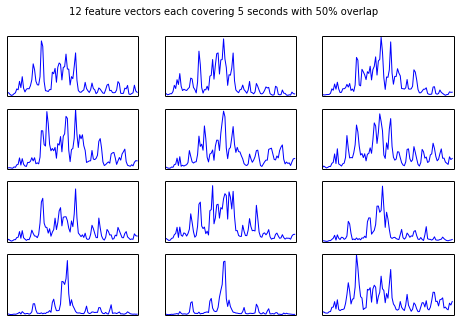

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 420.0 training, 5580.0 testing
  59 (+/- 1.0) <- [58 59 60 56 58 60 58 58 58 60]
  59 (+/- 1.2) <- [56 57 59 58 59 60 58 59 57 59]
  59 (+/- 0.9) <- [59 57 57 58 60 58 58 58 58 59]
  59 (+/- 1.1) <- [59 59 57 58 58 60 60 57 60 58]
  59 (+/- 1.4) <- [57 57 59 61 60 58 57 60 59 58]
  59 (+/- 0.6) <- [58 59 59 58 58 58 58 58 59 59]
  59 (+/- 1.1) <- [59 58 58 58 56 60 58 58 56 60]
  59 (+/- 0.6) <- [59 59 58 59 57 58 60 60 59 59]
  59 (+/- 0.9) <- [60 5

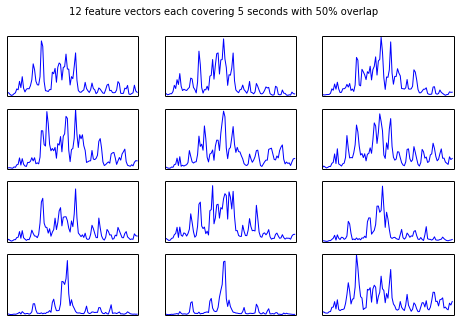

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 360.0 training, 5640.0 testing
  58 (+/- 1.1) <- [57 58 58 55 56 59 57 57 58 58]
  58 (+/- 1.4) <- [55 58 58 58 58 59 56 59 55 58]
  58 (+/- 1.0) <- [58 56 57 57 58 56 58 58 57 60]
  58 (+/- 0.7) <- [59 58 57 57 57 58 58 57 59 57]
  58 (+/- 1.1) <- [56 56 57 59 57 58 56 58 57 57]
  58 (+/- 1.0) <- [57 57 57 55 57 57 57 58 59 59]
  58 (+/- 1.3) <- [59 56 57 56 56 58 58 58 56 59]
  58 (+/- 0.8) <- [57 59 57 58 58 57 59 59 57 58]
  58 (+/- 0.8) <- [59 5

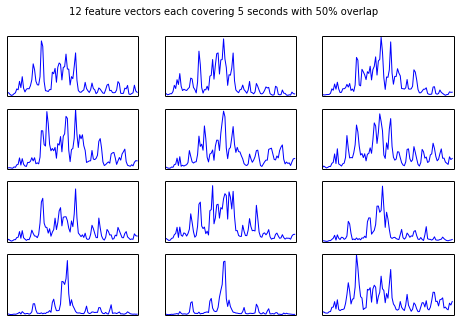

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 300.0 training, 5700.0 testing
  57 (+/- 1.2) <- [56 57 56 54 56 59 56 56 55 56]
  57 (+/- 1.4) <- [54 57 56 57 57 57 55 58 53 56]
  57 (+/- 1.2) <- [55 55 56 56 56 54 56 58 56 59]
  57 (+/- 0.8) <- [57 57 56 57 56 57 58 55 58 57]
  56 (+/- 1.2) <- [54 54 56 57 55 57 54 57 56 57]
  57 (+/- 0.9) <- [57 57 56 56 57 56 56 56 57 59]
  57 (+/- 1.2) <- [57 56 56 56 55 58 56 56 54 57]
  58 (+/- 0.9) <- [57 58 55 58 56 57 58 58 56 57]
  57 (+/- 0.8) <- [57 5

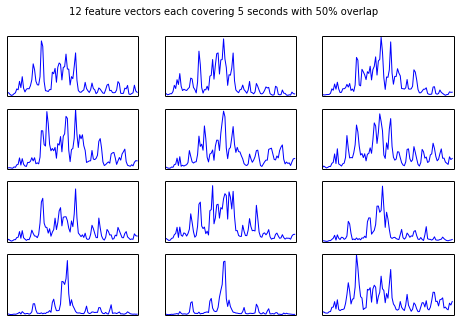

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 240.0 training, 5760.0 testing
  55 (+/- 1.4) <- [56 56 52 53 53 57 55 53 54 55]
  55 (+/- 1.5) <- [54 56 55 56 55 55 53 56 51 56]
  56 (+/- 1.1) <- [54 53 55 55 56 55 55 56 55 57]
  56 (+/- 1.0) <- [56 55 55 55 57 57 57 54 57 55]
  54 (+/- 1.4) <- [53 52 54 56 53 55 53 55 52 54]
  56 (+/- 1.5) <- [56 55 53 53 57 53 56 56 55 57]
  55 (+/- 1.2) <- [55 53 55 56 53 57 55 55 54 56]
  56 (+/- 1.2) <- [56 55 54 58 55 54 57 56 55 58]
  55 (+/- 1.0) <- [56 5

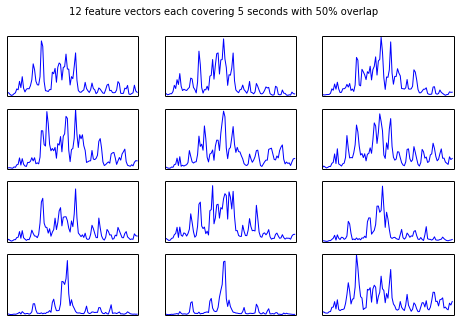

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 180.0 training, 5820.0 testing
  53 (+/- 2.0) <- [53 52 50 49 52 54 56 53 54 52]
  54 (+/- 2.2) <- [50 54 54 56 56 53 53 54 49 55]
  54 (+/- 1.3) <- [53 50 53 53 54 53 52 54 54 54]
  55 (+/- 0.8) <- [54 55 53 55 54 53 54 53 55 53]
  52 (+/- 1.6) <- [51 51 52 55 49 52 52 54 51 52]
  54 (+/- 1.0) <- [54 52 52 53 55 52 54 54 53 54]
  54 (+/- 1.4) <- [54 50 54 54 52 54 54 54 53 55]
  54 (+/- 1.3) <- [54 54 51 55 54 53 54 54 52 55]
  54 (+/- 1.2) <- [55 5

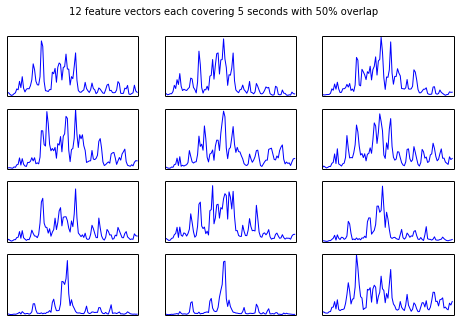

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 120.0 training, 5880.0 testing
  49 (+/- 4.5) <- [50 52 50 47 49 51 53 36 52 50]
  51 (+/- 2.3) <- [49 51 49 52 53 52 52 51 46 52]
  50 (+/- 2.1) <- [52 45 50 50 50 49 47 51 52 51]
  51 (+/- 1.6) <- [51 53 49 52 50 49 50 49 53 52]
  50 (+/- 1.8) <- [47 51 48 52 48 47 51 51 49 52]
  52 (+/- 1.5) <- [51 50 49 53 54 52 51 49 52 52]
  51 (+/- 1.8) <- [51 47 52 52 51 53 52 50 49 52]
  51 (+/- 1.5) <- [49 51 47 51 50 49 52 52 52 49]
  51 (+/- 1.5) <- [53 4

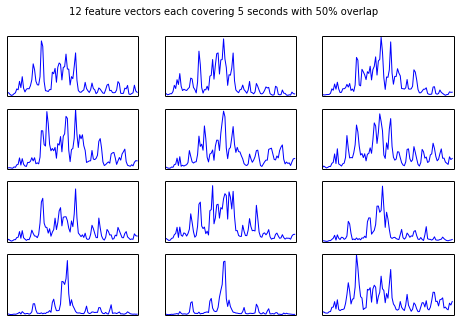

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 60.0 training, 5940.0 testing
  46 (+/- 2.6) <- [46 49 46 41 46 47 45 40 47 45]
  46 (+/- 2.0) <- [46 47 43 42 49 47 48 47 44 46]
  46 (+/- 2.4) <- [44 40 46 49 48 44 45 46 47 46]
  47 (+/- 2.5) <- [45 49 42 46 51 45 45 43 48 46]
  46 (+/- 2.9) <- [41 46 44 48 44 41 46 50 44 48]
  47 (+/- 1.4) <- [48 45 44 47 48 47 46 45 47 48]
  47 (+/- 2.8) <- [48 39 50 45 44 50 46 46 46 46]
  45 (+/- 3.7) <- [49 44 35 44 48 44 48 46 44 47]
  46 (+/- 1.6) <- [44 42

In [6]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if regen_baseline:
    res['baseline'] = []
    res['baseline_std'] = []
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
        res['baseline'].append(accuracy)
        res['baseline_std'].append(accuracy_std)
else:
    separator('Baseline')
    %run audio_classification.ipynb
    res['baseline'] = len(Pvalues) * [accuracy]
    res['baseline_std'] = accuracy_std

## Results

test_size = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
res['accuracy_std'] = [0.88165583398636616, 0.92316651332780619, 0.96804698356522423, 1.0687817911193573, 1.1820511759846726, 1.2953417024834313, 1.3741130258576952, 1.4914311421494204, 1.6346640729106237, 1.9857480601694719]
res['objective_j'] = [9808.2206726074219, 9808.2206726074219, 9808.2206726074219, 9808.2206726074219, 9808.2206726074219, 9808.2206726074219, 9808.2206726074219, 9808.2206726074219, 9808.2206726074219, 9808.2206726074219]
res['objective_i'] = [56374.7890625, 56374.7890625, 56374.7890625, 56374.7890625, 56374.7890625, 56374.7890625, 56374.7890625, 56374.7890625, 56374.7890625, 56374.7890625]
res['objective_h'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
res['objective_g'] = [76055.7421875, 76055.7421875, 76055.7421875, 76055.7421875, 76055.7421875, 76055.7421875, 76055.7421875, 76055.7421875, 76055.7421875, 76055.7421875]
res['baseline'] = [60.973703703703706, 60.376190476190459, 59.755344202898506, 58.92

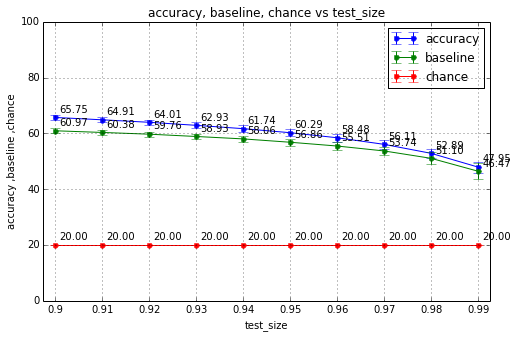

Experiment time: 2697 seconds


In [7]:
print('{} = {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms':
        print('res[\'{}\'] = {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

def div(l):
    div = Pvalues if Pname is l else [p[l]]
    return np.array([1 if v is None else v for v in div])

# Classification results.
res['chance'] = len(Pvalues) * [100./p['Ngenres']]
res['chance_std'] = 0
err=['accuracy_std', 'baseline_std', 'chance_std']
plot('accuracy', 'baseline', 'chance', err=err, ylim=[0,100])

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_i', 'objective_j', log=True)
    # Unweighted objectives.
    print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')
    res['objective_g_un'] = res['objective_g'] / div('ld')
    res['objective_i_un'] = res['objective_i'] / div('ls')
    res['objective_j_un'] = res['objective_j'] / div('lg')
    plot('objective_g_un', 'objective_i_un', 'objective_j_un', log=True)
    plot('sparsity', ylim=[0,100])
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))